In [1]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm
import sympy

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [2]:
def plot_boundary(X, model, ax):
    # meshgrid를 짜서 Model에 포워드 시키기
    # 뉴럴 네트웍 모델 자체가 함수이므로 (x,y)->z를 하는 것이다.
    x = np.linspace(min(X[:,0]), max(X[:,0]))
    y = np.linspace(min(X[:,1]), max(X[:,1]))
    
    xx, yy = np.meshgrid(x, y)
    grid_tensor = torch.Tensor(np.c_[xx.flatten(), yy.flatten()])
    zz = model.forward(grid_tensor).detach().numpy().reshape(xx.shape)
    ax.contour(xx, yy, zz, cmap='gray', levels=[0.5])

def logistic(x):
    return 1 / (1+np.exp(-x))

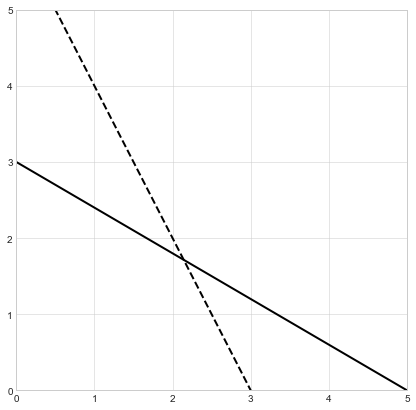

In [3]:
dcs_bnd_1 = lambda x: -(3/5)*x + 3
dcs_bnd_1_imp = lambda x, y: (3)*x + (5)*y + (-15)

dcs_bnd_2 = lambda x: -2*x + 6
dcs_bnd_2_imp = lambda x, y: (-6)*x + (-3)*y + (18)

x = np.linspace(0, 5, 50)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, dcs_bnd_1(x), color='k')
ax.plot(x, dcs_bnd_2(x), '--', color='k')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

plt.show()

In [4]:
np.random.seed(3)

# 0~5에서 무작위 점 500개 추출
N = 500
samples = (np.random.rand(N*2)*5).reshape(N,2)

In [5]:
samples.shape

(500, 2)

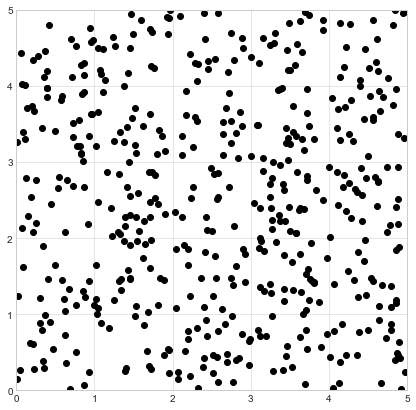

In [6]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.plot(samples[:,0], samples[:,1], 'o', color='k')
ax.set_ylim(0, 5)
ax.set_xlim(0, 5)

plt.show()

In [7]:
y1_bin = dcs_bnd_1_imp(samples[:,0], samples[:,1]) > 0
y2_bin = dcs_bnd_2_imp(samples[:,0], samples[:,1]) < 0

In [8]:
positive_where = np.where((y1_bin | y2_bin))[0]
target = np.zeros(N)
target[positive_where] = 1

print(target.shape)

(500,)


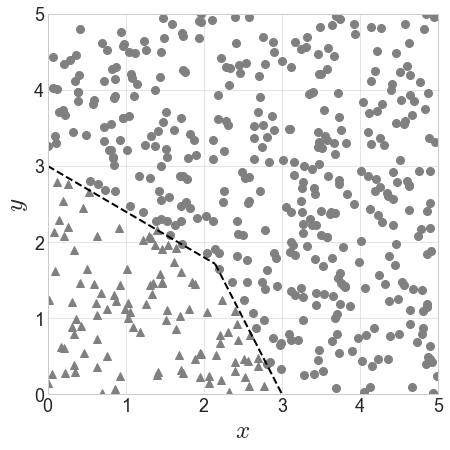

In [9]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

ax.plot(samples[np.where(target==1)[0],0], samples[np.where(target==1)[0],1], 'o', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)
ax.plot(samples[np.where(target==0)[0],0], samples[np.where(target==0)[0],1], '^', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

x1 = np.linspace(0, 15/7, 50)
x2 = np.linspace(15/7, 3, 50)

ax.plot(x1, dcs_bnd_1(x1), '--', color='k')
ax.plot(x2, dcs_bnd_2(x2), '--', color='k')

ax.set_ylim(0,5)
ax.set_xlim(0,5)

if file_print == True :
    fig.savefig("imgs/chap9/fig9-1.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap9/fig9-1.pdf", format='pdf', bbox_inches='tight')
    
plt.show()